# Rain Gauge Quality Comparison - Research Grade Rain Gauges

<b>Maggie Zoerner</b> </br>
SULI Intern</br>
Argonne National Laboratory</br>
Summer 2023</br>

This notebook is a case study for the heavy rainfall that occurred at the ATMOS site on July 5, 2023 and July 6, 2023! We will compare the performance of the research grade rain gauges, including: 

* Met One 8in Tipping Bucket Rain Gauge
* Met One Wind Shielded 8in Tipping Bucket Rain Gauge
* Met One 12in Tipping Bucket Rain Gauge
* Belfort Weighing Bucket Rain Gauge
* NovaLynx 12in Tipping Bucket Rain Gauge
* Optical Scientific (OSi) Optical Rain Gauge (ORG)
* FD70 Forward Scatter Sensor

These are also compared to the average of the three CoCoRaHS gauges we have on site.

The OSi All Precipitation Gauge (APG) was down for this case.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import xarray as xr 
import os
import matplotlib.pyplot as plt

## Import ORG/APG Data

In [2]:
ORGAPG_files = "C:/Users/maggi/ANL_Internship_2023/ORG_APG/ORG_APG_0705/*.nc"

In [3]:
ORGAPG_ds = xr.open_mfdataset(ORGAPG_files)

## Plot ORG Data

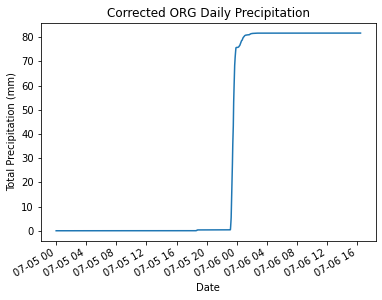

In [4]:
ORG_precip = ORGAPG_ds.ORG_Precip_Accum - ORGAPG_ds.ORG_Precip_Accum[0]
ORG_precip.plot()
plt.title('Corrected ORG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

## Plot 12in Tipping Bucket Data

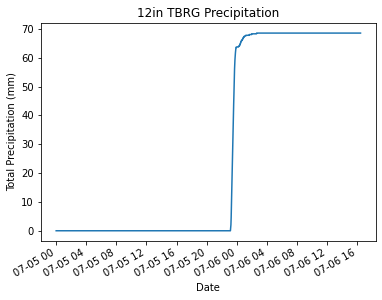

In [5]:
tbrg_12 = np.cumsum(ORGAPG_ds.tb_rain_mm_12in_Tot - ORGAPG_ds.tb_rain_mm_12in_Tot[0])
tbrg_12.plot()
plt.title('12in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

## Plot 8in Tipping Bucket Data

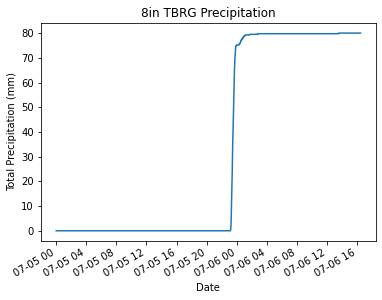

In [6]:
tbrg_8 = np.cumsum(ORGAPG_ds.tb_rain_mm_8in_Tot - ORGAPG_ds.tb_rain_mm_8in_Tot[0])
tbrg_8.plot()
plt.title('8in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

## Import Tower Data

In [7]:
tower_files = "C:/Users/maggi/ANL_Internship_2023/Tower_Rain_Gauge/tower_0705/*.nc"

In [8]:
tower_ds = xr.open_mfdataset(tower_files)

## Fix Tower Time Delay

In [9]:
tower_ds['time'] = pd.to_datetime(tower_ds['time'])
tower_ds['time'] = tower_ds['time'] + pd.Timedelta(hours=1)

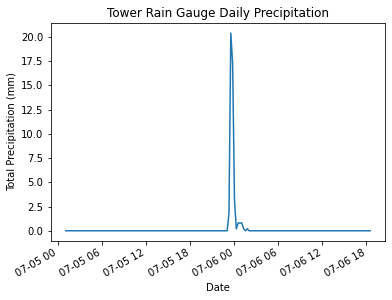

In [10]:
tower_precip = tower_ds.precip
tower_precip.plot()
plt.title('Tower Rain Gauge Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

## Plot Tower Accumulated Precip

Text(0, 0.5, 'Total Precipitation (mm)')

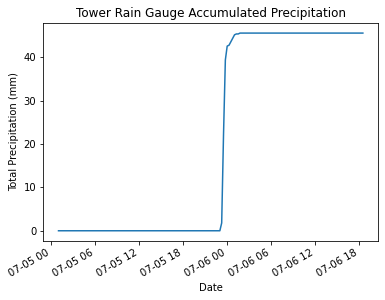

In [11]:
accumulated_tower_precip = np.cumsum(tower_precip)
accumulated_tower_precip.plot()
plt.title('Tower Rain Gauge Accumulated Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

## Import FD70 Data

In [12]:
FD70_data = "C:/Users/maggi/ANL_Internship_2023/FD70_Rain_Gauge/FD70_0705/*.nc"
FD70_ds = xr.open_mfdataset(FD70_data)

## Plot FD70 Data

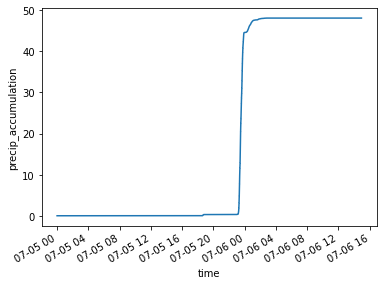

In [13]:
FD70_precip = (FD70_ds.precip_accumulation-FD70_ds.precip_accumulation[0])
FD70_precip.plot()

## Import Met One 12in Tipping Bucket Data

In [14]:
metone12_data = "C:/Users/maggi/ANL_Internship_2023/MetOne_12in/metone12_0705/*.nc"
metone12_ds = xr.open_mfdataset(metone12_data)

## Plot Met One 12 in Data

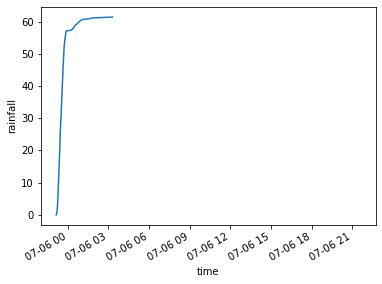

In [15]:
metone12_precip = ((metone12_ds.rainfall)-metone12_ds.rainfall[0])
metone12_precip.plot()

## Add CoCoRaHS Data

In [16]:
cocorahs = 59.004

## Add Belfort Weighing Gauge Data

In [17]:
belfort = 59.69

## Add Error Measurements for Each Rain Gauge

In [18]:
error_fd70 = 2.2
error_novalynx = 1.0
error_metone_8 = 1.0 #use 1.0 for heavy rain (25.4-76.2 mm/hr), and 0.5 for light (<12.7 mm/hr)
error_metone_tower =  1.0 
error_wbrg = 0.5
error_metone_12 = 1.0 #use 2.0 for heavy rain (< 76.2 mm/hr), and 0.5 for light (<12.7 mm/hr)
error_org = 5.0
error_apg = 5.0
error_crh = 4.0

## Plot data from all rain gauges

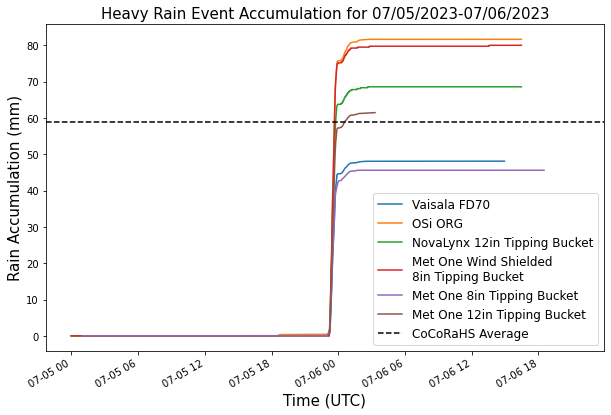

In [19]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

FD70_precip.plot(ax=ax1, label='Vaisala FD70')
ORG_precip.plot(ax=ax1, label='OSi ORG')
#APG_precip.plot(ax=ax1, label='APG')
tbrg_12.plot(ax=ax1, label='NovaLynx 12in Tipping Bucket')
tbrg_8.plot(ax=ax1, label='Met One Wind Shielded \n8in Tipping Bucket')
accumulated_tower_precip.plot(ax=ax1, label='Met One 8in Tipping Bucket')
metone12_precip.plot(ax=ax1, label='Met One 12in Tipping Bucket')

plt.axhline(cocorahs, color='black', linestyle='--', label='CoCoRaHS Average')

ax1.set_title('Heavy Rain Event Accumulation for 07/05/2023-07/06/2023',fontsize=15)
ax1.set_xlabel('Time (UTC)',fontsize=15)
ax1.set_ylabel('Rain Accumulation (mm)',fontsize=15)
ax1.legend(fontsize=12, loc='best')
# Show the two plots
plt.show()

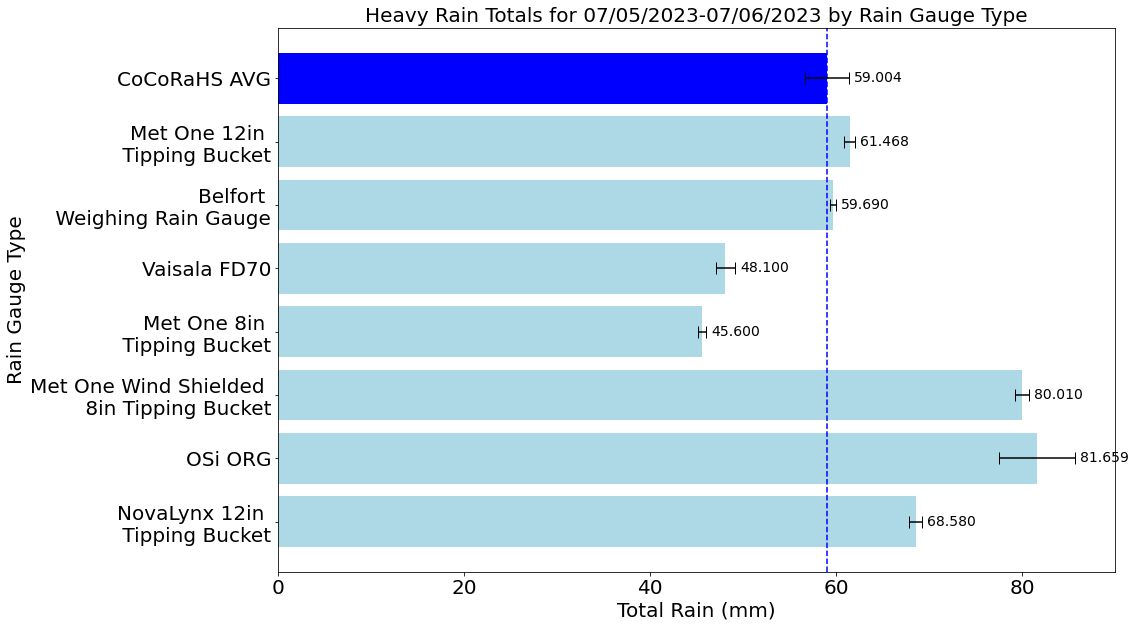

In [20]:
rain_gauge_labels = ['NovaLynx 12in \n Tipping Bucket', 'OSi ORG', 'Met One Wind Shielded \n 8in Tipping Bucket', 'Met One 8in \n Tipping Bucket', 'Vaisala FD70', 'Belfort \n Weighing Rain Gauge', 'Met One 12in \n Tipping Bucket']
rainfall_amounts = [tbrg_12.max(), ORG_precip.max(), tbrg_8.max(), accumulated_tower_precip.max(), FD70_precip.max(), belfort, metone12_precip.max()]
fig = plt.figure(figsize = (15, 10))
ax=fig.add_subplot(111)
all_rg_bar=plt.barh(rain_gauge_labels, rainfall_amounts, color ='lightblue')

# Adding and plotting the CoCoRaHS data
crh_bar=ax.barh(['CoCoRaHS AVG'], [cocorahs], color='b')

# Add a line to be able to more clearly visualize the "true" value of the total event rainfall
plt.axvline(x = cocorahs, color = 'b', linestyle='--')

# Add error percentages 
error_percentages = [error_novalynx, error_org, error_metone_8, error_metone_tower, error_fd70, error_wbrg, error_metone_12]

error_bars = np.array(rainfall_amounts)*np.array(error_percentages)/100

error_bars_crh = cocorahs*error_crh/100

all_rg_bar = ax.barh(rain_gauge_labels, rainfall_amounts, xerr = error_bars, color='lightblue',capsize=6)
ax.bar_label(all_rg_bar, fmt ='%.3f', padding = 5, fontsize = 14)

crh_bar = ax.barh(['CoCoRaHS AVG'], cocorahs, xerr=error_bars_crh, color='b', capsize=6)
ax.bar_label(crh_bar, fmt = '%.3f', padding = 5, fontsize = 14)

# Plot the graph
plt.ylabel("Rain Gauge Type", fontsize=20)
plt.xlabel("Total Rain (mm)", fontsize=20)
plt.title("Heavy Rain Totals for 07/05/2023-07/06/2023 by Rain Gauge Type", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Compare optical rain gauges to determine which detected the rainfall first

### Select the time frame you would like to look at

In [21]:
start_time = '2023-07-05 T23:00:00'
end_time = '2023-07-05 T23:20:00'

### Take slices of the optical rain gauge data for the selected time frame

In [22]:
FD70_onset = FD70_precip.sel(time=slice(start_time, end_time))
ORG_precip_onset = ORG_precip.sel(time=slice(start_time, end_time))
#APG_precip_onset = APG_precip.sel(time=slice(start_time, end_time))

### Make the plot

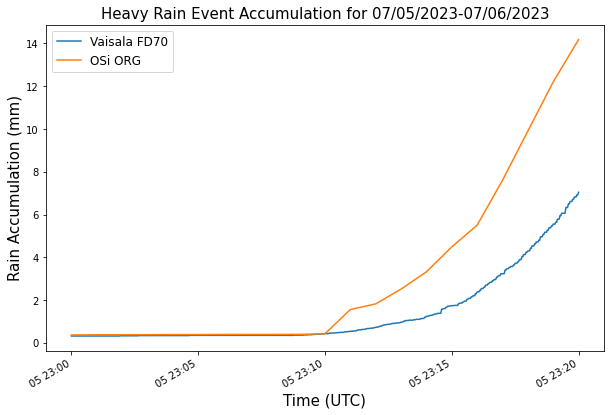

In [23]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

FD70_onset.plot(ax=ax1, label='Vaisala FD70')
ORG_precip_onset.plot(ax=ax1, label='OSi ORG')
#APG_precip.plot(ax=ax1, label='APG')

ax1.set_title('Heavy Rain Event Accumulation for 07/05/2023-07/06/2023',fontsize=15)
ax1.set_xlabel('Time (UTC)',fontsize=15)
ax1.set_ylabel('Rain Accumulation (mm)',fontsize=15)
ax1.legend(fontsize=12)
# Show the two plots
plt.show()